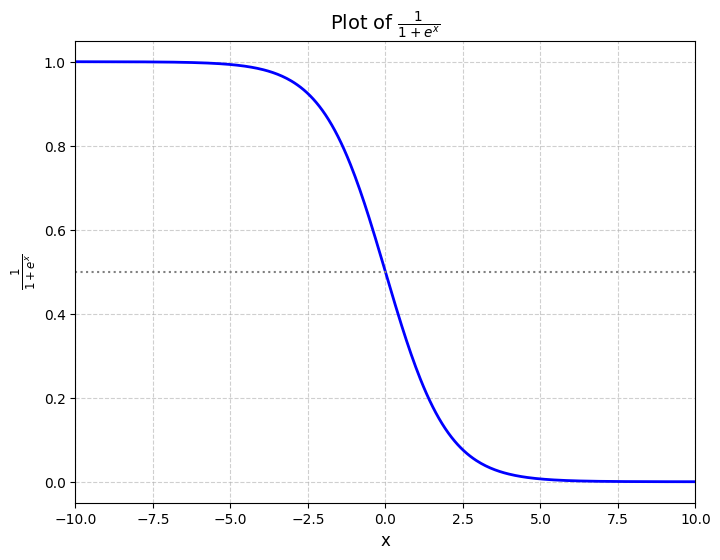

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)
# Compute y = 1 / (1 + exp(x))
y = 1 / (1 + np.exp(x))

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Plot of $\\frac{1}{1 + e^{x}}$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('$\\frac{1}{1 + e^{x}}$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle=':')  # Add horizontal line at y=0.5
plt.xlim(-10, 10)  # Set x-axis limits
plt.show()

In [ ]:
# single s aeg1
# 0.02

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
k_values = np.linspace(0.1, 1, 10)  # Example k values

# ==========================
# Running Trials
# ==========================
reward_counts = {k: 0 for k in k_values}
regret_counts = {k: 0 for k in k_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for k in k_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            UCB_Inspired_Adaptive_Epsilon_Greedy,
            {'num_arms': num_arms, 'k': k},
            env,
            num_steps
        )
        trial_rewards[k] = cum_rewards[-1]
        trial_regrets[k] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_ks = [k for k, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_ks[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_ks = [k for k, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_ks[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for k in k_values:
    results.append({
        'k': f"{k:.3f}",
        'Reward Wins': reward_counts[k],
        'Regret Wins': regret_counts[k]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'Adaptive Epsilon-Greedy Performance Over {num_trials} Trials')
              )
display(results_df)


In [ ]:
# single s ucb
# 0.4

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
c_values = np.linspace(0.1, 3, 10)  # Example c values

# ==========================
# Running Trials
# ==========================
reward_counts = {c: 0 for c in c_values}
regret_counts = {c: 0 for c in c_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for c in c_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            UCB,
            {'num_arms': num_arms, 'c': c},
            env,
            num_steps
        )
        trial_rewards[c] = cum_rewards[-1]
        trial_regrets[c] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_cs = [c for c, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_cs[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_cs = [c for c, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_cs[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for c in c_values:
    results.append({
        'c': f"{c:.3f}",
        'Reward Wins': reward_counts[c],
        'Regret Wins': regret_counts[c]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'UCB Performance Over {num_trials} Trials')
              )
display(results_df)


In [ ]:
# single s exp3

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
gamma_values = np.linspace(0.01, 0.3, 10)  # Example gamma values

# ==========================
# Running Trials
# ==========================
reward_counts = {gamma: 0 for gamma in gamma_values}
regret_counts = {gamma: 0 for gamma in gamma_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for gamma in gamma_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            EXP3,
            {'num_arms': num_arms, 'gamma': gamma},
            env,
            num_steps
        )
        trial_rewards[gamma] = cum_rewards[-1]
        trial_regrets[gamma] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_gammas = [gamma for gamma, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_gammas[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_gammas = [gamma for gamma, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_gammas[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for gamma in gamma_values:
    results.append({
        'gamma': f"{gamma:.3f}",
        'Reward Wins': reward_counts[gamma],
        'Regret Wins': regret_counts[gamma]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'EXP3 Performance Over {num_trials} Trials')
              )
display(results_df)


In [ ]:
# single s e
# 0.01

import numpy as np
import pandas as pd

# ==========================
# Experiment Configuration
# ==========================

num_trials = 100
epsilon_values = np.linspace(0.01, 1, 10)  # Example epsilon values

# ==========================
# Running Trials
# ==========================
reward_counts = {epsilon: 0 for epsilon in epsilon_values}
regret_counts = {epsilon: 0 for epsilon in epsilon_values}

for trial in range(num_trials):
    trial_rewards = {}
    trial_regrets = {}
    for epsilon in epsilon_values:
        env = OTCEnvironment(spreads, competitor_spread=competitor_spread, alpha=alpha)
        cum_rewards, cum_regrets, _ = run_experiment(
            EpsilonGreedy,
            {'num_arms': num_arms, 'epsilon': epsilon},
            env,
            num_steps
        )
        trial_rewards[epsilon] = cum_rewards[-1]
        trial_regrets[epsilon] = cum_regrets[-1]
    
    # Update counts for highest reward
    max_reward = max(trial_rewards.values())
    best_reward_epsilons = [epsilon for epsilon, v in trial_rewards.items() if v == max_reward]
    reward_counts[best_reward_epsilons[0]] += 1
    
    # Update counts for lowest regret
    min_regret = min(trial_regrets.values())
    best_regret_epsilons = [epsilon for epsilon, v in trial_regrets.items() if v == min_regret]
    regret_counts[best_regret_epsilons[0]] += 1

    if trial % 10 == 0:
        print(trial)

# ==========================
# Creating Results Table
# ==========================
results = []
for epsilon in epsilon_values:
    results.append({
        'epsilon': f"{epsilon:.3f}",
        'Reward Wins': reward_counts[epsilon],
        'Regret Wins': regret_counts[epsilon]
    })

# Sort by Regret Wins ascending (lowest regret first)
results_df = (pd.DataFrame(results)
              .sort_values(by='Regret Wins', ascending=False)
              .reset_index(drop=True)
              .style
              .set_caption(f'Standard ε-Greedy Performance Over {num_trials} Trials')
              )
display(results_df)


### the optimal solution of adaptive epsilon greeny parameters in different environments

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def smart_batch_tune_and_plot(env_factory, env_name, num_steps, num_arms,
                               fixed_l_vals, varying_f_vals, fixed_f_vals, varying_l_vals,
                               agent_class, mode="single"):
    """
    Automatically selects appropriate runner based on environment mode.
    mode: "single", "ns_single", "multi", "ns_multi"
    """
    def run(agent_params):
        env = env_factory()
        if mode == "single":
            _, regret = run_experiment(agent_class, agent_params, env, num_steps)
        elif mode == "ns_single":
            _, regret = run_new_experiment(agent_class, agent_params, env_params, num_steps)
        elif mode == "multi":
            _, regret = run_multiagent_experiment(agent_class, agent_params, env, num_agents=4, num_steps=num_steps)
        elif mode == "ns_multi":
            _, regret = run_experiment_ns_multi(agent_class, agent_params, env, num_steps, num_agents=4)
        else:
            raise ValueError("Unsupported mode")
        return regret

    for l in fixed_l_vals:
        plt.figure(figsize=(10, 5))
        for f in varying_f_vals:
            agent_params = {'num_arms': num_arms, 'l': l, 'f': f}
            regret = run(agent_params)
            plt.plot(regret, label=f'f={f}')
        plt.title(f'{env_name} | Fixed l={l}, Varying f')
        plt.xlabel("Time Steps")
        plt.ylabel("Cumulative Regret")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"smart_tune_f_fixed_l{l}_{env_name.replace(' ', '_')}.png")
        plt.show()

    for f in fixed_f_vals:
        plt.figure(figsize=(10, 5))
        for l in varying_l_vals:
            agent_params = {'num_arms': num_arms, 'l': l, 'f': f}
            regret = run(agent_params)
            plt.plot(regret, label=f'l={l}')
        plt.title(f'{env_name} | Fixed f={f}, Varying l')
        plt.xlabel("Time Steps")
        plt.ylabel("Cumulative Regret")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"smart_tune_l_fixed_f{f}_{env_name.replace(' ', '_')}.png")
        plt.show()

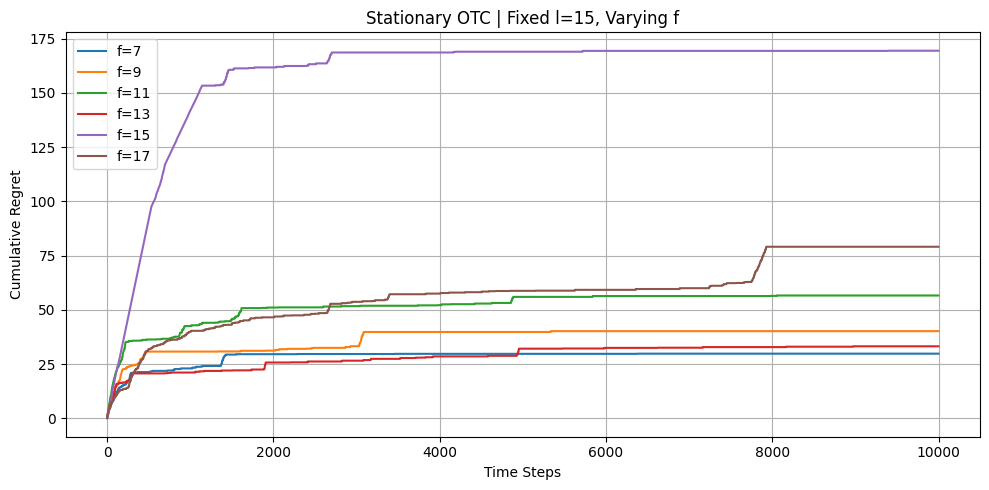

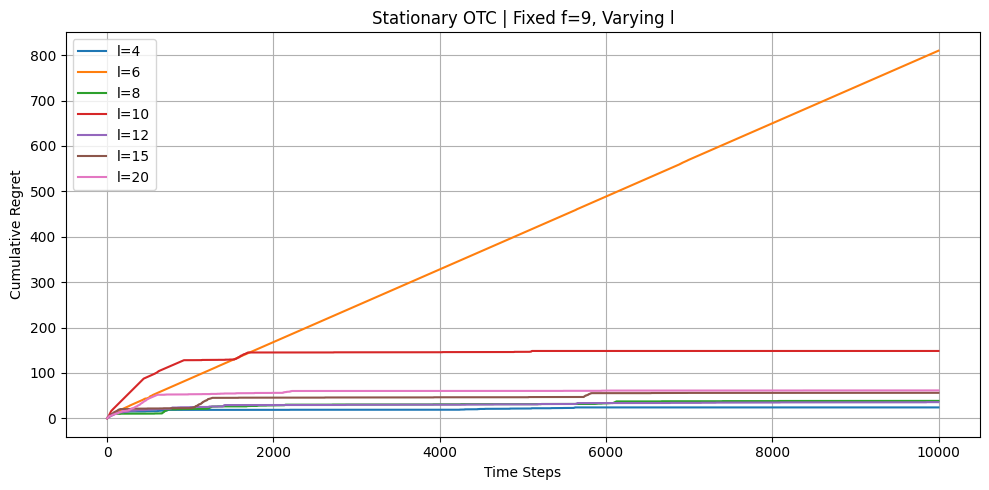

In [ ]:
# ==========================
# Global Configuration
# ==========================
spreads = [0.1, 0.3, 0.5, 0.7, 0.9]
num_arms = len(spreads)
num_steps = 10000
alpha = 0.4
competitor_spread = 0.7
dynamic_interval = 2000
adversarial_penalty = 0.1
penalty_mode = 'linear'
num_agents = 1  # Single agent version

# ==========================
# Environment Factory Functions
# ==========================
def make_stationary_env():
    return OTCEnvironment(spreads, competitor_spread, alpha)

def make_ns_env():
    return NonStationaryOTCEnvironment(spreads, competitor_spread, alpha, dynamic_interval)

def make_ma_env():
    return MultiAgentOTCEnvironment(spreads, competitor_spread, alpha, penalty_mode, adversarial_penalty)

def make_ma_ns_env():
    return NonStationaryMultiAgentOTCEnvironment(spreads, competitor_spread, alpha, dynamic_interval, adversarial_penalty, penalty_mode)

# ==========================
# Stationary Environment
# ==========================

# parameter
fixed_l_vals = [15]
varying_f_vals = [7, 9, 11, 13, 15, 17]
fixed_f_vals = [9]
varying_l_vals = [4, 6, 8, 10, 12, 15, 20]

# Stationary
smart_batch_tune_and_plot(make_stationary_env, "Stationary OTC", num_steps, num_arms,
                          fixed_l_vals, varying_f_vals, fixed_f_vals, varying_l_vals,
                          agent_class=Adaptive_Epsilon_Greedy,
                          mode="single")


[Step 2000] Competitor spread changed: 0.7 ➜ 0.7
[Step 4000] Competitor spread changed: 0.7 ➜ 0.1
[Step 6000] Competitor spread changed: 0.1 ➜ 0.7
[Step 8000] Competitor spread changed: 0.7 ➜ 0.9
[Step 10000] Competitor spread changed: 0.9 ➜ 0.7
[Step 2000] Competitor spread changed: 0.7 ➜ 0.7
[Step 4000] Competitor spread changed: 0.7 ➜ 0.5
[Step 6000] Competitor spread changed: 0.5 ➜ 0.7
[Step 8000] Competitor spread changed: 0.7 ➜ 0.9
[Step 10000] Competitor spread changed: 0.9 ➜ 0.9
[Step 2000] Competitor spread changed: 0.7 ➜ 0.5
[Step 4000] Competitor spread changed: 0.5 ➜ 0.7
[Step 6000] Competitor spread changed: 0.7 ➜ 0.9
[Step 8000] Competitor spread changed: 0.9 ➜ 0.9
[Step 10000] Competitor spread changed: 0.9 ➜ 0.5
[Step 2000] Competitor spread changed: 0.7 ➜ 0.9
[Step 4000] Competitor spread changed: 0.9 ➜ 0.5
[Step 6000] Competitor spread changed: 0.5 ➜ 0.3
[Step 8000] Competitor spread changed: 0.3 ➜ 0.7
[Step 10000] Competitor spread changed: 0.7 ➜ 0.5
[Step 2000] Comp

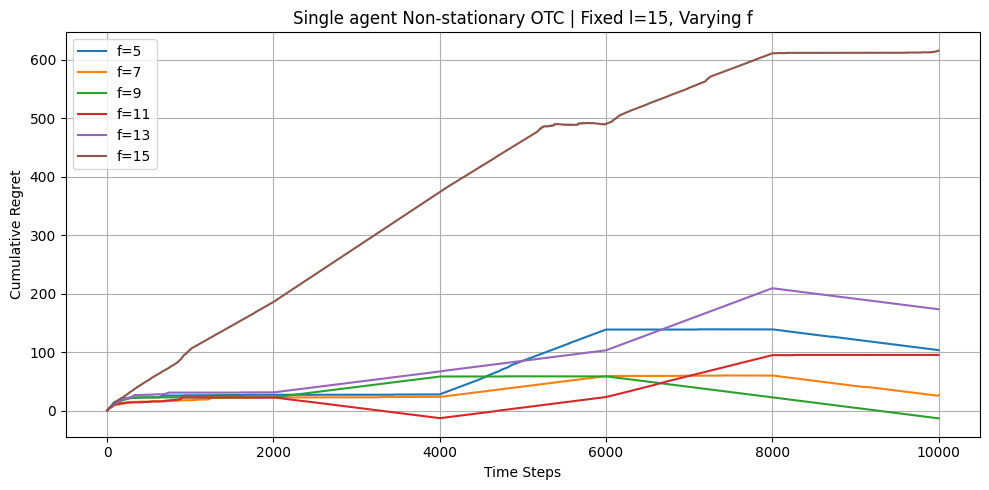

[Step 2000] Competitor spread changed: 0.7 ➜ 0.7
[Step 4000] Competitor spread changed: 0.7 ➜ 0.1
[Step 6000] Competitor spread changed: 0.1 ➜ 0.1
[Step 8000] Competitor spread changed: 0.1 ➜ 0.3
[Step 10000] Competitor spread changed: 0.3 ➜ 0.7
[Step 2000] Competitor spread changed: 0.7 ➜ 0.1
[Step 4000] Competitor spread changed: 0.1 ➜ 0.9
[Step 6000] Competitor spread changed: 0.9 ➜ 0.3
[Step 8000] Competitor spread changed: 0.3 ➜ 0.1
[Step 10000] Competitor spread changed: 0.1 ➜ 0.9
[Step 2000] Competitor spread changed: 0.7 ➜ 0.7
[Step 4000] Competitor spread changed: 0.7 ➜ 0.5
[Step 6000] Competitor spread changed: 0.5 ➜ 0.5
[Step 8000] Competitor spread changed: 0.5 ➜ 0.3
[Step 10000] Competitor spread changed: 0.3 ➜ 0.3
[Step 2000] Competitor spread changed: 0.7 ➜ 0.7
[Step 4000] Competitor spread changed: 0.7 ➜ 0.7
[Step 6000] Competitor spread changed: 0.7 ➜ 0.3
[Step 8000] Competitor spread changed: 0.3 ➜ 0.1
[Step 10000] Competitor spread changed: 0.1 ➜ 0.3
[Step 2000] Comp

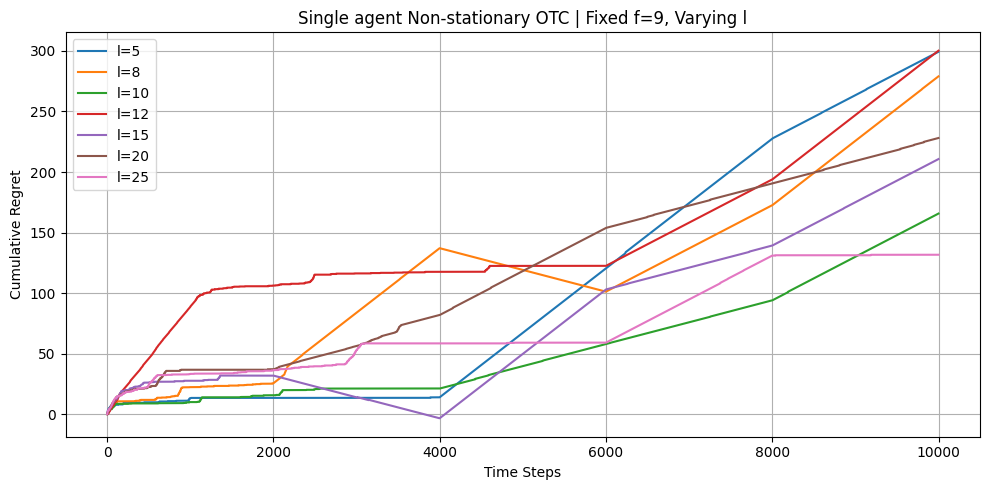

In [ ]:
# ==========================
# Single Agent Non-Stationary Environment
# ==========================

# parameter
fixed_l_vals = [15]
varying_f_vals = [5, 7, 9, 11, 13, 15]
fixed_f_vals = [9]
varying_l_vals = [5, 8, 10, 12, 15, 20, 25]

smart_batch_tune_and_plot(make_ns_env, "Single agent Non-stationary OTC", num_steps, num_arms,
                          fixed_l_vals, varying_f_vals, fixed_f_vals, varying_l_vals,
                          agent_class=Adaptive_Epsilon_Greedy,
                          mode="ns_single")


[Step 2000] Competitor spread changed: 0.7 ➜ 0.7
[Step 4000] Competitor spread changed: 0.7 ➜ 0.1
[Step 6000] Competitor spread changed: 0.1 ➜ 0.9
[Step 8000] Competitor spread changed: 0.9 ➜ 0.3
[Step 10000] Competitor spread changed: 0.3 ➜ 0.1
[Step 12000] Competitor spread changed: 0.1 ➜ 0.9
[Step 14000] Competitor spread changed: 0.9 ➜ 0.7
[Step 16000] Competitor spread changed: 0.7 ➜ 0.3
[Step 18000] Competitor spread changed: 0.3 ➜ 0.3
[Step 20000] Competitor spread changed: 0.3 ➜ 0.5
[Step 22000] Competitor spread changed: 0.5 ➜ 0.7
[Step 24000] Competitor spread changed: 0.7 ➜ 0.9
[Step 26000] Competitor spread changed: 0.9 ➜ 0.7
[Step 28000] Competitor spread changed: 0.7 ➜ 0.5
[Step 30000] Competitor spread changed: 0.5 ➜ 0.3
[Step 32000] Competitor spread changed: 0.3 ➜ 0.7
[Step 34000] Competitor spread changed: 0.7 ➜ 0.1
[Step 36000] Competitor spread changed: 0.1 ➜ 0.7
[Step 38000] Competitor spread changed: 0.7 ➜ 0.5
[Step 40000] Competitor spread changed: 0.5 ➜ 0.1
[Ste

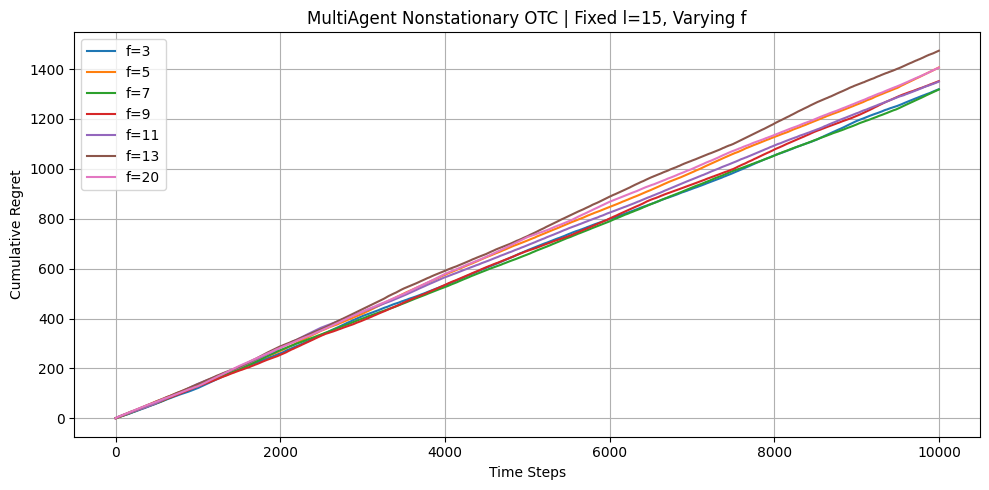

[Step 2000] Competitor spread changed: 0.7 ➜ 0.9
[Step 4000] Competitor spread changed: 0.9 ➜ 0.3
[Step 6000] Competitor spread changed: 0.3 ➜ 0.5
[Step 8000] Competitor spread changed: 0.5 ➜ 0.1
[Step 10000] Competitor spread changed: 0.1 ➜ 0.9
[Step 12000] Competitor spread changed: 0.9 ➜ 0.9
[Step 14000] Competitor spread changed: 0.9 ➜ 0.5
[Step 16000] Competitor spread changed: 0.5 ➜ 0.1
[Step 18000] Competitor spread changed: 0.1 ➜ 0.9
[Step 20000] Competitor spread changed: 0.9 ➜ 0.1
[Step 22000] Competitor spread changed: 0.1 ➜ 0.1
[Step 24000] Competitor spread changed: 0.1 ➜ 0.5
[Step 26000] Competitor spread changed: 0.5 ➜ 0.9
[Step 28000] Competitor spread changed: 0.9 ➜ 0.3
[Step 30000] Competitor spread changed: 0.3 ➜ 0.7
[Step 32000] Competitor spread changed: 0.7 ➜ 0.7
[Step 34000] Competitor spread changed: 0.7 ➜ 0.7
[Step 36000] Competitor spread changed: 0.7 ➜ 0.1
[Step 38000] Competitor spread changed: 0.1 ➜ 0.1
[Step 40000] Competitor spread changed: 0.1 ➜ 0.7
[Ste

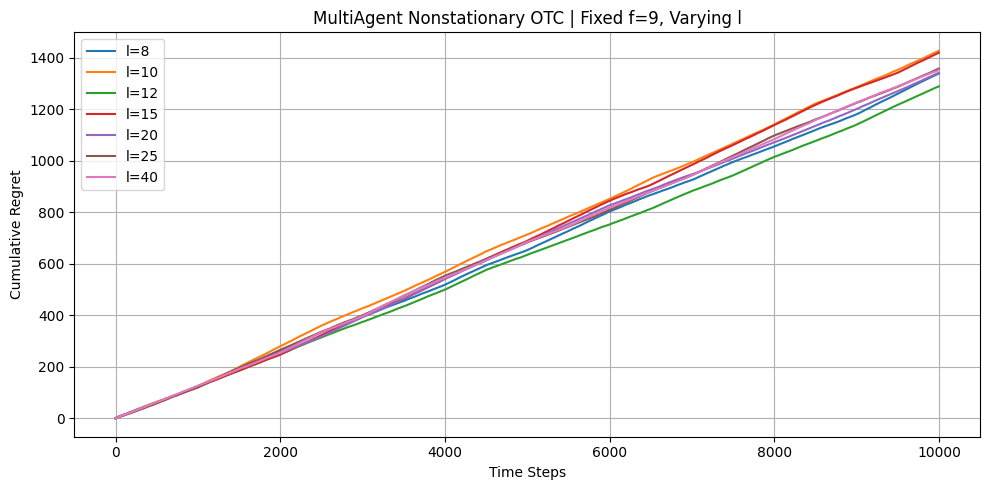

In [ ]:
# ==========================
# Multi Agent Non-stationary Environment
# ==========================

# parameter
fixed_l_vals = [15]
varying_f_vals = [3, 5, 7, 9, 11, 13, 20]
fixed_f_vals = [9]
varying_l_vals = [8, 10, 12, 15, 20, 25, 40]

smart_batch_tune_and_plot(make_ma_ns_env, "MultiAgent Nonstationary OTC", num_steps, num_arms,
                          fixed_l_vals, varying_f_vals, fixed_f_vals, varying_l_vals,
                          agent_class=Adaptive_Epsilon_Greedy,
                          mode="ns_multi")

#### Generate a heatmap based on the above

[Step 2000] Competitor spread changed: 0.7 ➜ 0.1
[Step 4000] Competitor spread changed: 0.1 ➜ 0.3
[Step 6000] Competitor spread changed: 0.3 ➜ 0.5
[Step 8000] Competitor spread changed: 0.5 ➜ 0.7
[Step 10000] Competitor spread changed: 0.7 ➜ 0.5
[Step 2000] Competitor spread changed: 0.7 ➜ 0.3
[Step 4000] Competitor spread changed: 0.3 ➜ 0.7
[Step 6000] Competitor spread changed: 0.7 ➜ 0.7
[Step 8000] Competitor spread changed: 0.7 ➜ 0.5
[Step 10000] Competitor spread changed: 0.5 ➜ 0.9
[Step 2000] Competitor spread changed: 0.7 ➜ 0.3
[Step 4000] Competitor spread changed: 0.3 ➜ 0.3
[Step 6000] Competitor spread changed: 0.3 ➜ 0.7
[Step 8000] Competitor spread changed: 0.7 ➜ 0.9
[Step 10000] Competitor spread changed: 0.9 ➜ 0.3
[Step 2000] Competitor spread changed: 0.7 ➜ 0.5
[Step 4000] Competitor spread changed: 0.5 ➜ 0.3
[Step 6000] Competitor spread changed: 0.3 ➜ 0.9
[Step 8000] Competitor spread changed: 0.9 ➜ 0.3
[Step 10000] Competitor spread changed: 0.3 ➜ 0.9
[Step 2000] Comp

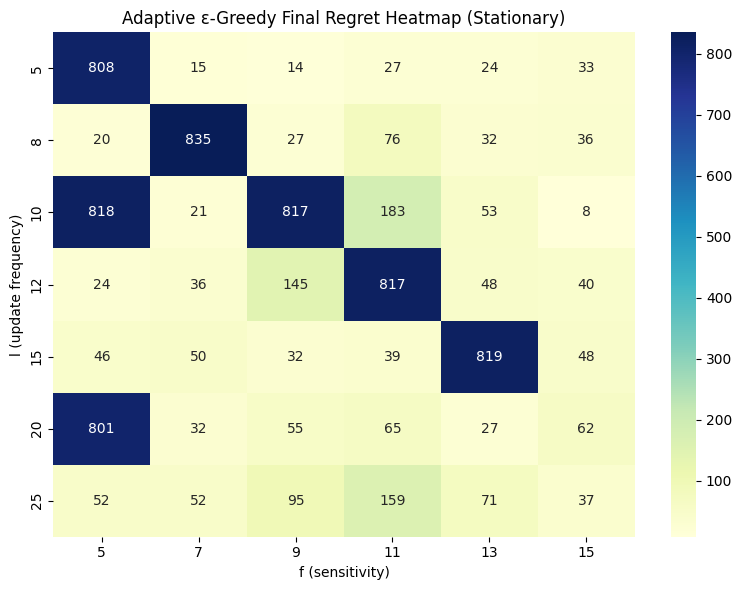

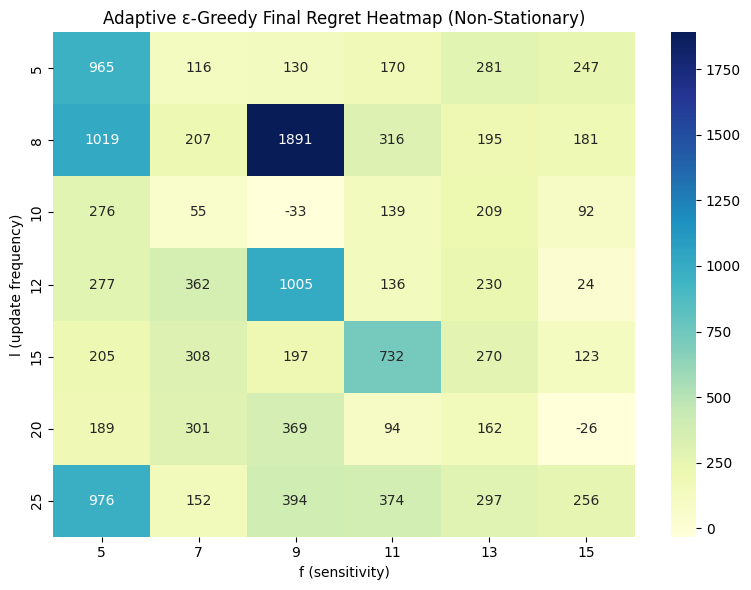

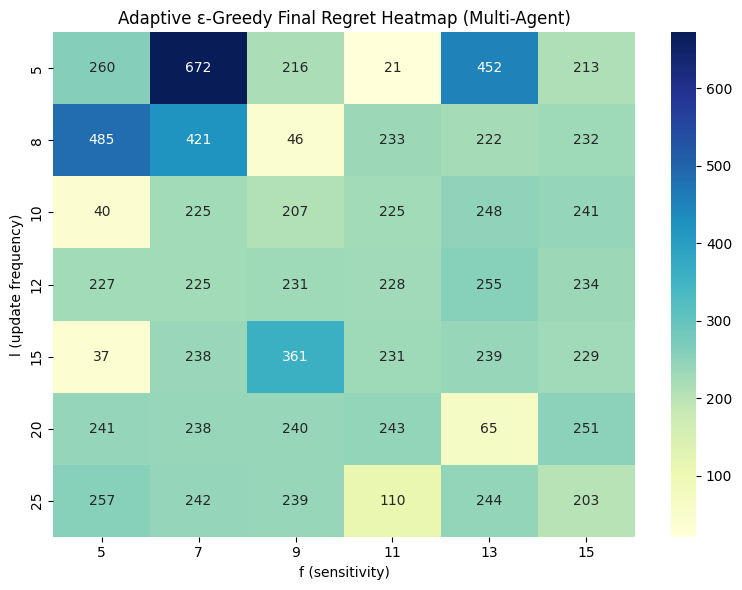

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_adaptive_heatmap_grid(regret_dict, l_vals, f_vals, title_prefix, save_prefix=None):
    """
    regret_dict: dict like {(l, f): regret_list or final_regret_value}
    l_vals, f_vals: list of values used
    title_prefix: environment name
    save_prefix: if provided, saves figure as PNG
    """
    regret_final = {}
    for (l, f), vals in regret_dict.items():
        final_regret = vals[-1] if isinstance(vals, (list, tuple, np.ndarray)) else vals
        regret_final[(l, f)] = final_regret

    df = pd.DataFrame.from_dict(regret_final, orient='index', columns=['regret'])
    df.index = pd.MultiIndex.from_tuples(df.index, names=["l", "f"])
    heatmap_data = df.unstack().regret

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title(f"Adaptive ε-Greedy Final Regret Heatmap ({title_prefix})")
    plt.ylabel("l (update frequency)")
    plt.xlabel("f (sensitivity)")
    plt.tight_layout()
    if save_prefix:
        plt.savefig(f"{save_prefix}_heatmap.png", dpi=300)
    plt.show()

# Example usage assuming your results are stored as:
# results_stationary = {(l, f): regret_list}
# results_nonstationary = {(l, f): regret_list}
# results_multiagent = {(l, f): regret_list}

# Replace these with the actual dictionaries from RS1(1)
# plot_adaptive_heatmap_grid(results_stationary, l_vals, f_vals, "Stationary", "stationary")
# plot_adaptive_heatmap_grid(results_nonstationary, l_vals, f_vals, "Non-Stationary", "nonstationary")
# plot_adaptive_heatmap_grid(results_multiagent, l_vals, f_vals, "Multi-Agent", "multiagent")

# 设定参数范围
l_vals = [5, 8, 10, 12, 15, 20, 25]
f_vals = [5, 7, 9, 11, 13, 15]

# 初始化结果字典
results_stationary = {}
results_nonstationary = {}
results_multiagent = {}

# ========== 运行单智能体 Stationary 环境 ==========
for l in l_vals:
    for f in f_vals:
        env = make_stationary_env()
        _, regret = run_experiment(Adaptive_Epsilon_Greedy, {'num_arms': num_arms, 'l': l, 'f': f}, env, num_steps)
        results_stationary[(l, f)] = regret

# ========== 运行单智能体 Non-Stationary 环境 ==========
for l in l_vals:
    for f in f_vals:
        env = make_ns_env()
        _, regret = run_new_experiment(Adaptive_Epsilon_Greedy, {'num_arms': num_arms, 'l': l, 'f': f}, env_params, num_steps)
        results_nonstationary[(l, f)] = regret

# ========== 运行 Multi-Agent 环境（stationary） ==========
for l in l_vals:
    for f in f_vals:
        env = make_ma_env()
        _, regret_list = run_multiagent_experiment(Adaptive_Epsilon_Greedy, {'num_arms': num_arms, 'l': l, 'f': f}, env, num_agents=4, num_steps=num_steps)
        avg_regret = np.mean(regret_list, axis=0)
        results_multiagent[(l, f)] = avg_regret

plot_adaptive_heatmap_grid(results_stationary, l_vals, f_vals, "Stationary", "stationary")
plot_adaptive_heatmap_grid(results_nonstationary, l_vals, f_vals, "Non-Stationary", "nonstationary")
plot_adaptive_heatmap_grid(results_multiagent, l_vals, f_vals, "Multi-Agent", "multiagent")

